In [1]:
!pip install xgboost --user

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [89]:
sns.set_theme()
df_all = pd.read_csv('/mnt/CO2Pred/data/br_all_features.csv')

In [90]:
df_all.head()

,Unnamed: 0,Harvest_Year,Field_Name,Latitude,Longitude,Crop_Area_ha,Total_Wet_Mass_Harvested_kg,Dry_Finished_Yield_Mass_kg,Soil_Organic_Matter,Soil_Drainage,...,P_as_P2O5_%,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm,result,value,unit
0,0,2020,M6I2035,"S 19Â° 23' 25,00""","W 47Â° 27' 01,70""",60.0,182960.0,180200.0,2.5,good,...,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0,emissions_total,-13221.26,kgCO2e
1,1,2020,M6I2035,"S 19Â° 23' 25,00""","W 47Â° 27' 01,70""",60.0,182960.0,180200.0,2.5,good,...,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0,emissions_per_area,-220.35,kgCO2e/ha
2,2,2020,M6I2035,"S 19Â° 23' 25,00""","W 47Â° 27' 01,70""",60.0,182960.0,180200.0,2.5,good,...,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0,emissions_per_product,-0.07,kgCO2e/kg
3,3,2020,M6I2035,"S 19Â° 23' 25,00""","W 47Â° 27' 01,70""",60.0,182960.0,180200.0,2.5,good,...,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0,soil_organic_carbon,1.45,%
4,4,2020,M6I2035,"S 19Â° 23' 25,00""","W 47Â° 27' 01,70""",60.0,182960.0,180200.0,2.5,good,...,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0,machinery_fuel_usage,1862.20,litre


In [91]:
df_all["dry2Wet"] = df_all['Dry_Finished_Yield_Mass_kg']/df_all['Total_Wet_Mass_Harvested_kg']
df_all = df_all[((df_all["dry2Wet"] >= 0.2) & (df_all["dry2Wet"] <= 0.6))]

In [92]:
df_all.to_csv("dry_wet_ratio_filtered.csv")

In [93]:
df_all["dry2Wet"].max()

0.21469314460758424

In [47]:
df_all.drop(columns = ["Unnamed: 0", "Harvest_Year", "Field_Name", "Latitude", "Longitude", "Crop_Area_ha", "result", "value", "unit"], inplace = True)

In [48]:
df_all.head()

,Total_Wet_Mass_Harvested_kg,Dry_Finished_Yield_Mass_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,Application_Rate_Unit_kg/ha,Application_Method,N_as_Urea_%,N_as_Nitrate_%,N_as_Ammonium_%,P_as_Phosphorus_%,P_as_P2O5_%,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm
0,182960.0,180200.0,2.5,good,5.5,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0
1,182960.0,180200.0,2.5,good,5.5,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0
2,182960.0,180200.0,2.5,good,5.5,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0
3,182960.0,180200.0,2.5,good,5.5,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0
4,182960.0,180200.0,2.5,good,5.5,Compose your own NPK,300.0,Incorporate,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,herbicide spraying,15.0,350.0


In [49]:
df_1e = df_all.copy()
cat_columns = ["Fertilizer_Type", "Application_Method", "Machine", "Soil_Drainage"]
for col in cat_columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df_all[col])
    df_1e[col] = encoded

In [50]:
df_1e.head()

,Total_Wet_Mass_Harvested_kg,Dry_Finished_Yield_Mass_kg,Soil_Organic_Matter,Soil_Drainage,Soil_pH,Fertilizer_Type,Application_Rate_Unit_kg/ha,Application_Method,N_as_Urea_%,N_as_Nitrate_%,N_as_Ammonium_%,P_as_Phosphorus_%,P_as_P2O5_%,K_as_Potassium_%,K_as_K2O_%,Crop_Protection_Application_Doses,Machine,Num_Passes,Total_Water_Applied_mm
0,182960.0,180200.0,2.5,0,5.5,2,300.0,1,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,0,15.0,350.0
1,182960.0,180200.0,2.5,0,5.5,2,300.0,1,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,0,15.0,350.0
2,182960.0,180200.0,2.5,0,5.5,2,300.0,1,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,0,15.0,350.0
3,182960.0,180200.0,2.5,0,5.5,2,300.0,1,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,0,15.0,350.0
4,182960.0,180200.0,2.5,0,5.5,2,300.0,1,0.0,16.0,0.0,16.0,0.0,16.0,0.0,14.0,0,15.0,350.0


In [51]:
df_1e.shape

(14442, 19)

In [61]:
df_1e["dry2Wet"] = df_1e['Dry_Finished_Yield_Mass_kg']/df_1e['Total_Wet_Mass_Harvested_kg']
df_1e = df_1e[((df_1e["dry2Wet"] >= 0.2) & (df_1e["dry2Wet"] <= 0.6))]

In [62]:
df_1e.shape

(13561, 20)

In [63]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
tf.keras.backend.set_floatx('float64')

np.set_printoptions(precision=3, suppress=True)

2023-04-13 19:53:54.296060: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/oracle/instantclient_12_1:/usr/lib/jvm/java-8-openjdk-amd64/jre/lib/amd64/server:
2023-04-13 19:53:54.296113: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.4.1


In [64]:
train_dataset = df_1e.sample(frac=0.8, random_state=0)
test_dataset = df_1e.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Total_Wet_Mass_Harvested_kg')
test_labels = test_features.pop('Total_Wet_Mass_Harvested_kg')

In [67]:
# normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis = -1)

normalizer.adapt(np.array(train_features))

2023-04-13 19:54:52.168556: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-13 19:54:52.170408: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/oracle/instantclient_12_1:/usr/lib/jvm/java-8-openjdk-amd64/jre/lib/amd64/server:
2023-04-13 19:54:52.170461: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-13 19:54:52.170491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (run-64381fd34182ec77cea1b2ba-dh8qz): /proc/driver/nvidia/version does not exist
2023-04-13 19:54:52.170746: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CP

In [68]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(24, activation='tanh'),
        layers.Dense(24, activation='relu'),
        layers.Dense(24, activation='tanh'),
        layers.Dense(24, activation='relu'),
        layers.Dense(24, activation='tanh'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [69]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 19)                39        
_________________________________________________________________
dense (Dense)                (None, 24)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2

In [70]:
def plot_loss(history):
    plt.semilogy(history.history['loss'], label='loss')
    plt.semilogy(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.01])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Total_Wet_Mass_Harvested_kg]')
    plt.legend()
    plt.grid(True)

In [71]:
# %%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=300)

2023-04-13 19:55:06.409501: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-13 19:55:06.419383: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2999995000 Hz


/tmp/ipykernel_640/3527425194.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 0.01])


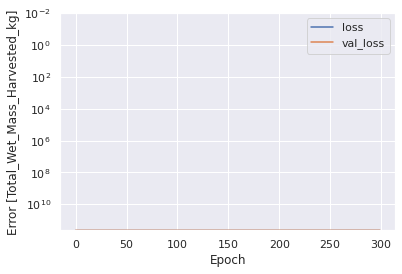

In [72]:
plot_loss(history)

In [73]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
295,4.371621e+11,4.248613e+11,295
296,4.371544e+11,4.248537e+11,296
297,4.371467e+11,4.248461e+11,297
298,4.371391e+11,4.248385e+11,298
299,4.371314e+11,4.248310e+11,299


In [74]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [77]:
test_results
train_predictions = dnn_model.predict(train_features).flatten()

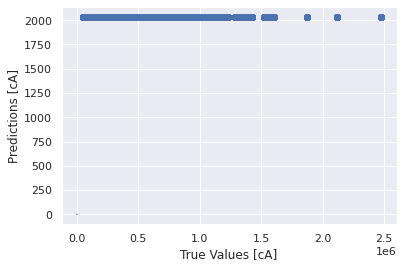

In [80]:
a = plt.axes()
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [cA]')
plt.ylabel('Predictions [cA]')
# lims = [0.1, 1.1]
# plt.xlim(lims)
# plt.ylim(lims)
_ = plt.plot(lims, lims)

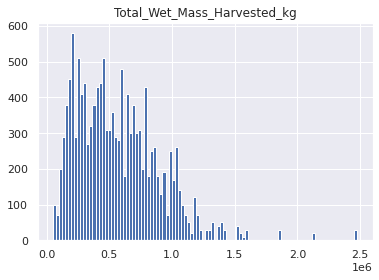

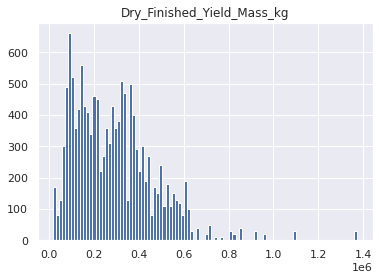

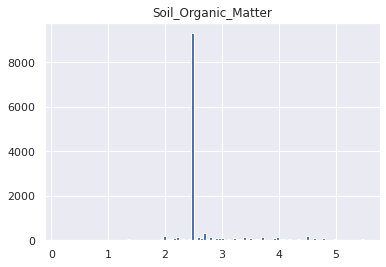

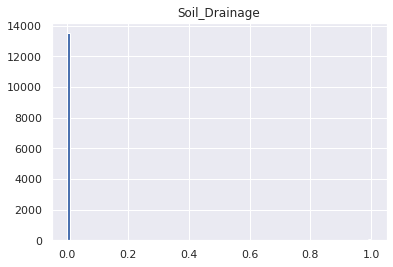

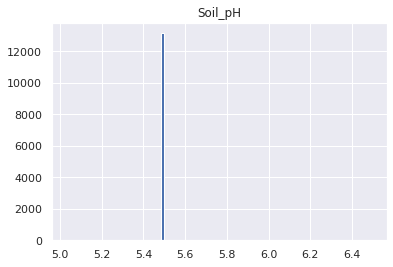

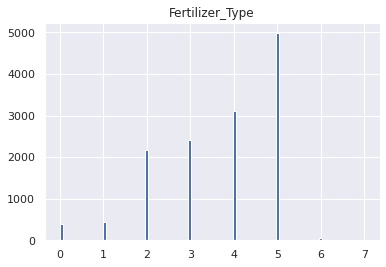

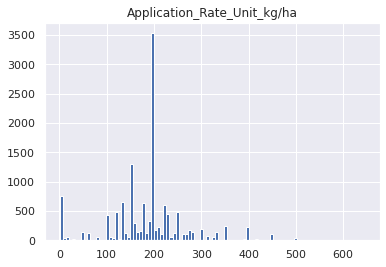

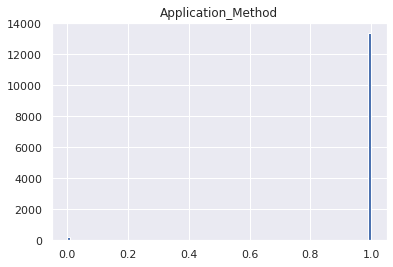

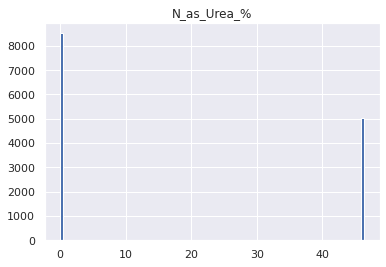

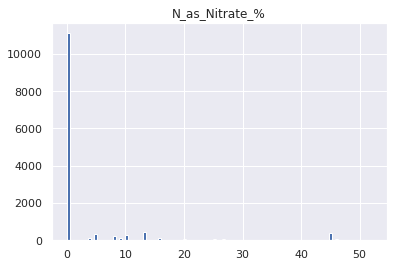

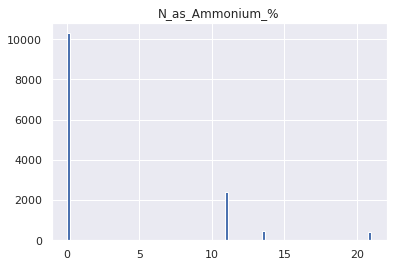

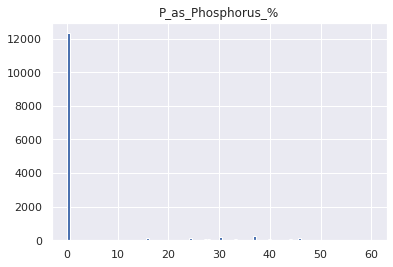

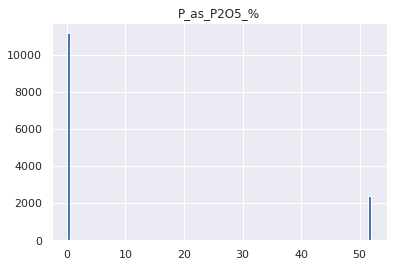

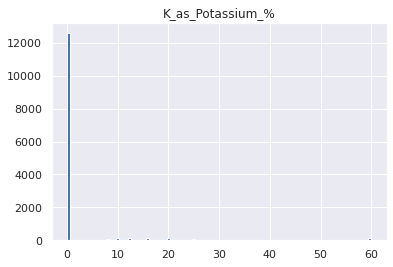

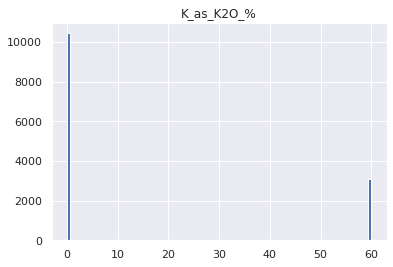

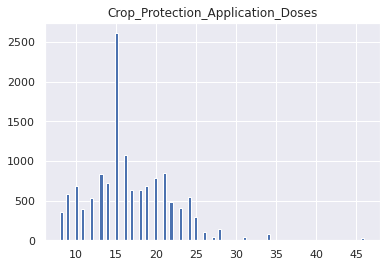

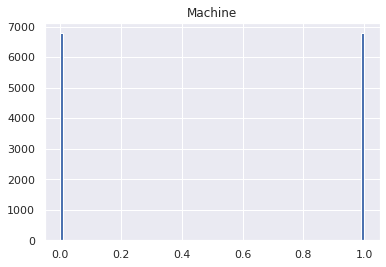

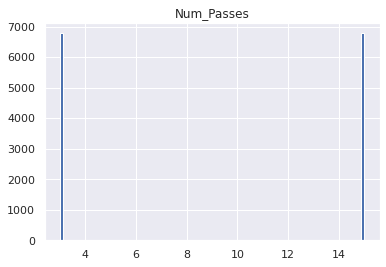

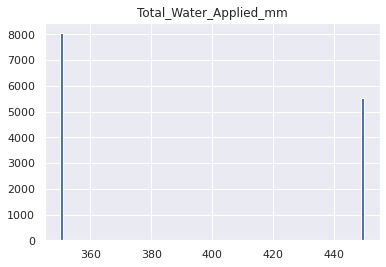

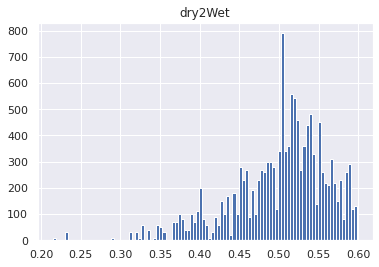

In [84]:
for col in df_1e.columns:
        fig, ax = plt.subplots(1,1)
        ax.hist(df_1e.loc[:, col], bins = 100)
        ax.set_title(col)